# Quantitative Analysis

> This task focus on using TA-Lib to calculate various technical indicators and visualize the findings.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import talib
import pynance
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

c:\Users\DELL\anaconda3\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# loading the files
aapl = pd.read_csv('AAPL_historical_data.csv')
amzn = pd.read_csv('AMZN_historical_data.csv')
goog = pd.read_csv('GOOG_historical_data.csv')
meta = pd.read_csv('META_historical_data.csv')
msft = pd.read_csv('MSFT_historical_data.csv')
nvda = pd.read_csv('NVDA_historical_data.csv')
tsla = pd.read_csv('TSLA_historical_data.csv')

In [3]:
# get info on the files
aapl.info() # 10998 row
amzn.info() # 6846 row
goog.info() # 5020 row
meta.info() # 2926 row
msft.info() # 9672 row
nvda.info() # 6421 row
tsla.info() # 3545 row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null  

In [4]:
# adding the stock column on each file
aapl['stock'] = 'aapl'
amzn['stock'] = 'amzn'
goog['stock'] = 'goog'
meta['stock'] = 'meta'
msft['stock'] = 'msft'
nvda['stock'] = 'nvda'
tsla['stock'] = 'tsla'

In [5]:
# merge the dataframes
dataframe_list = [aapl, amzn, goog, meta, msft , nvda, tsla]
df_stock = pd.concat(dataframe_list, ignore_index = False)

In [6]:
# the shape of the dateframe
df_stock.shape

(45428, 10)

In [7]:
# get information on the merged dataframe
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45428 entries, 0 to 3544
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
 9   stock         45428 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 3.8+ MB


In [8]:
# describe the dataframe
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,45428.000000,45428.000000,45428.000000,45428.000000,45428.000000,4.542800e+04,45428.000000,45428.000000
mean,46.798370,47.397792,46.190101,46.810590,45.367891,2.177785e+08,0.000847,0.002499
std,78.259474,79.277620,77.218532,78.274673,78.049554,3.076645e+08,0.022527,0.155291
min,0.034896,0.035547,0.033333,0.034115,0.031291,0.000000e+00,0.000000,0.000000
25%,0.690500,0.708000,0.673541,0.693604,0.585204,4.746455e+07,0.000000,0.000000
50%,13.646101,13.827710,13.463250,13.644750,13.076301,9.921200e+07,0.000000,0.000000
75%,47.242501,47.720626,46.628125,47.193626,44.768961,2.610595e+08,0.000000,0.000000
max,542.349976,542.809998,528.359985,539.909973,539.909973,9.230856e+09,3.080000,20.000000


In [9]:
# calculate moving averages, relative strength index and moving average convergence divergence
def calculate_ta_indeicators(group):
    group = group.copy()
    group['SMA_20'] = talib.SMA(group['Adj Close'], timeperiod = 20)  # calculate 20-day simple moving average 
    group['EMA_20'] = talib.EMA(group['Adj Close'], timeperiod = 20)  # calculate 20-day exponential moving average 
    group['RSI_14'] = talib.RSI(group['Adj Close'], timeperiod = 14)  # calculate 14-day relative strength index 
    group['MACD'], group['MACD_Signal'], group['MACD_Hist'] = talib.MACD(group['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)  # calculate moving average index    
    group['OBV'] = talib.OBV(group['Close'], group['Volume'])  # calculate On-Balance Volume (OBV)

    return group

df_stock.sort_values(by = ['stock', 'Date'],inplace = True)
df_grouped = df_stock.groupby('stock', group_keys = False).apply(calculate_ta_indeicators)

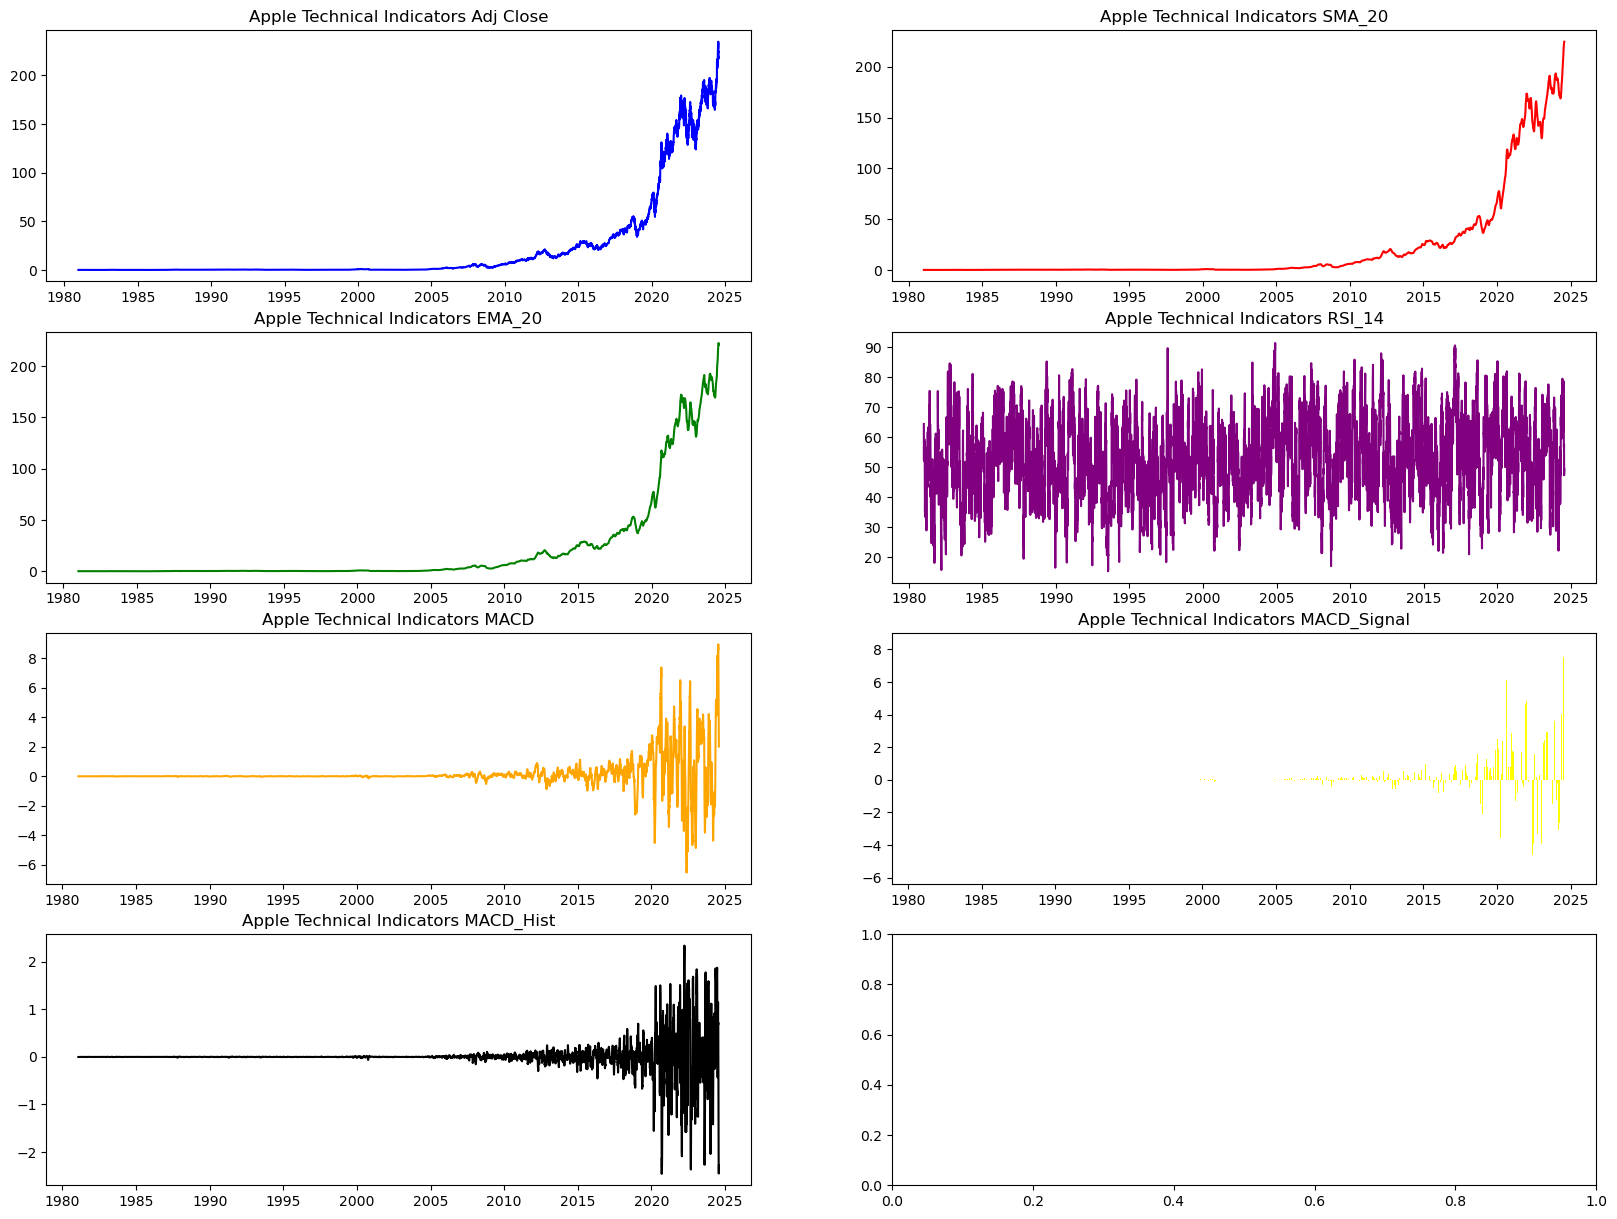

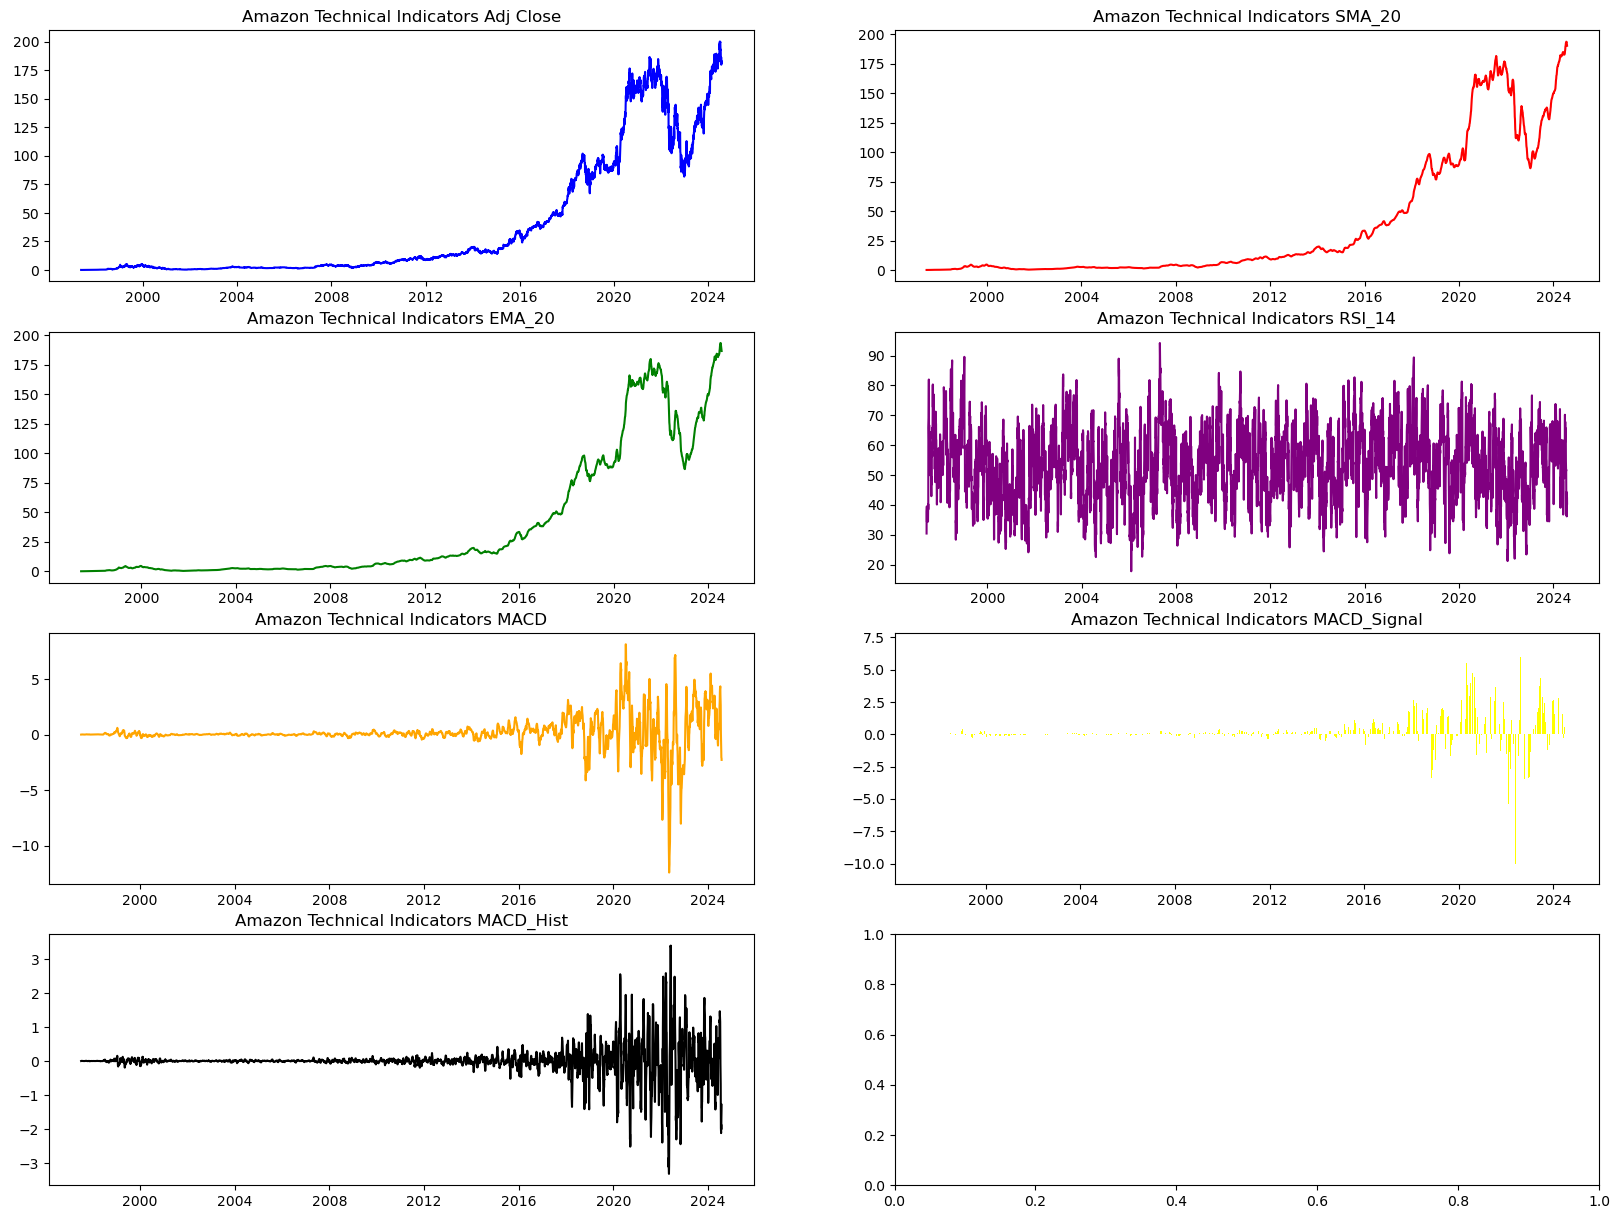

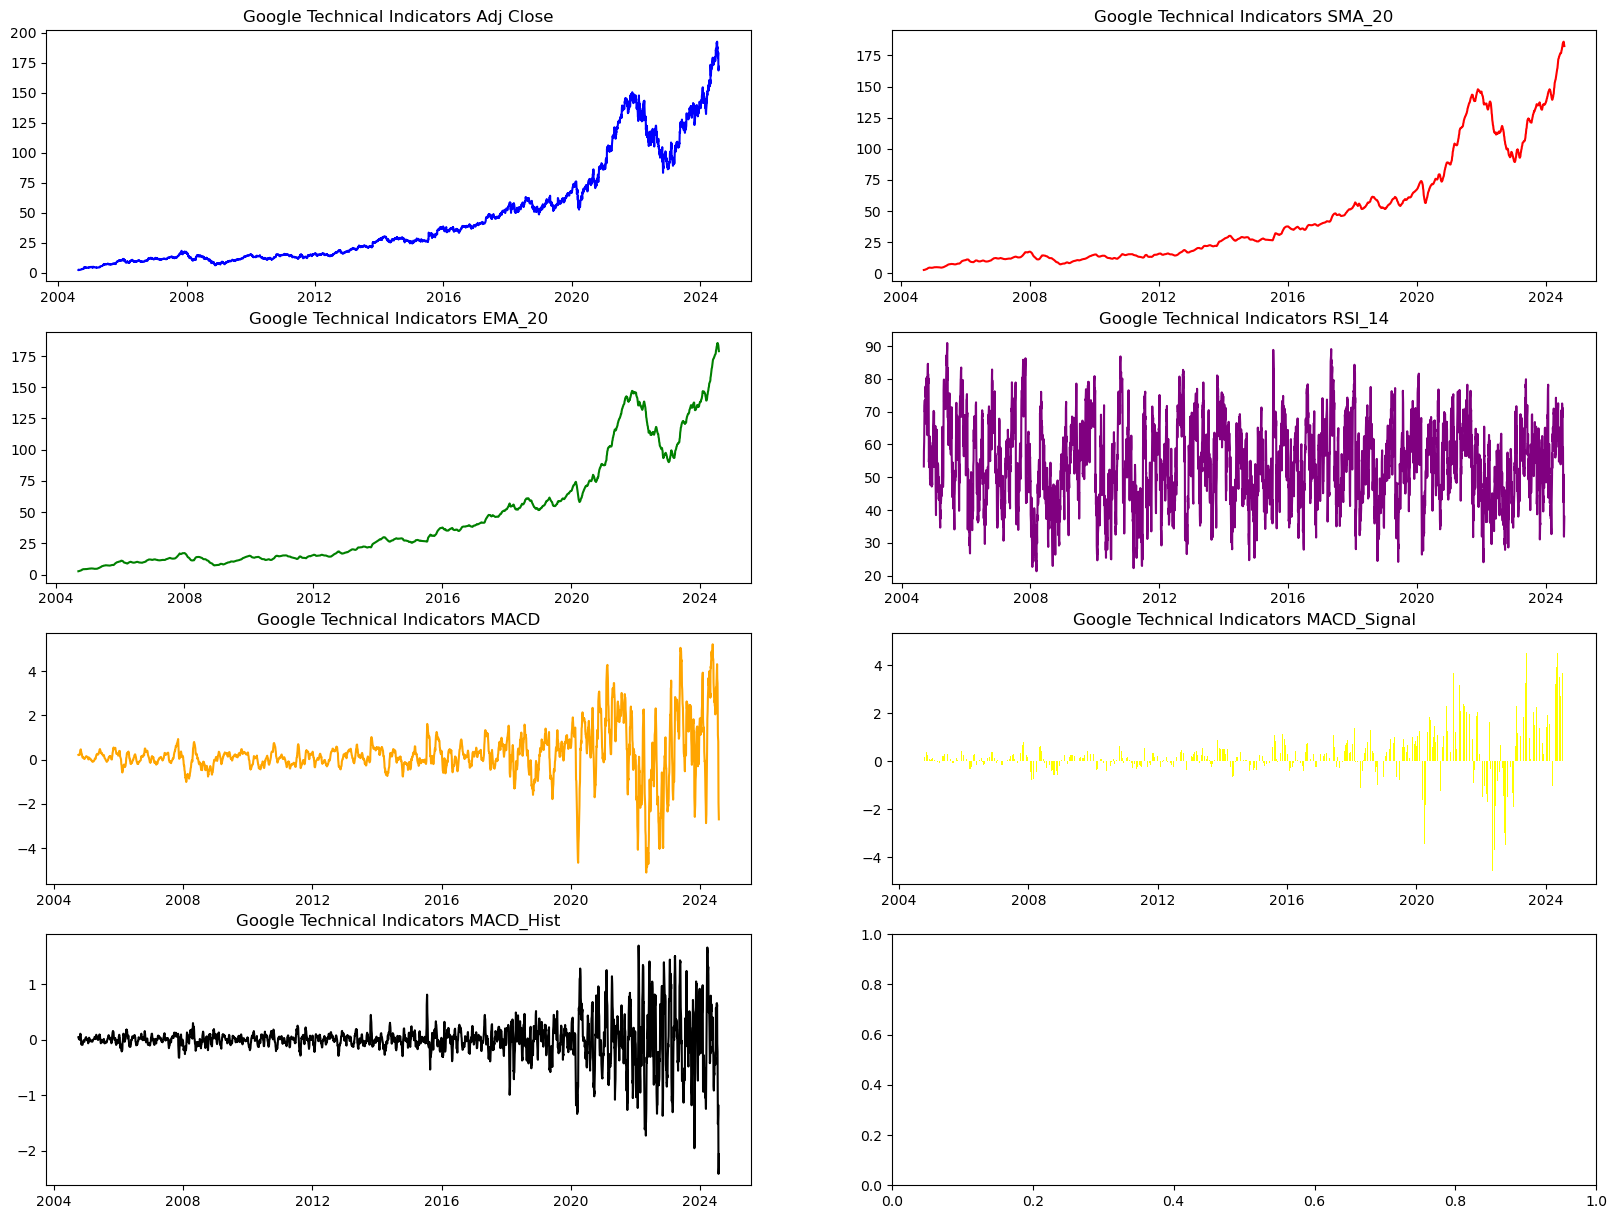

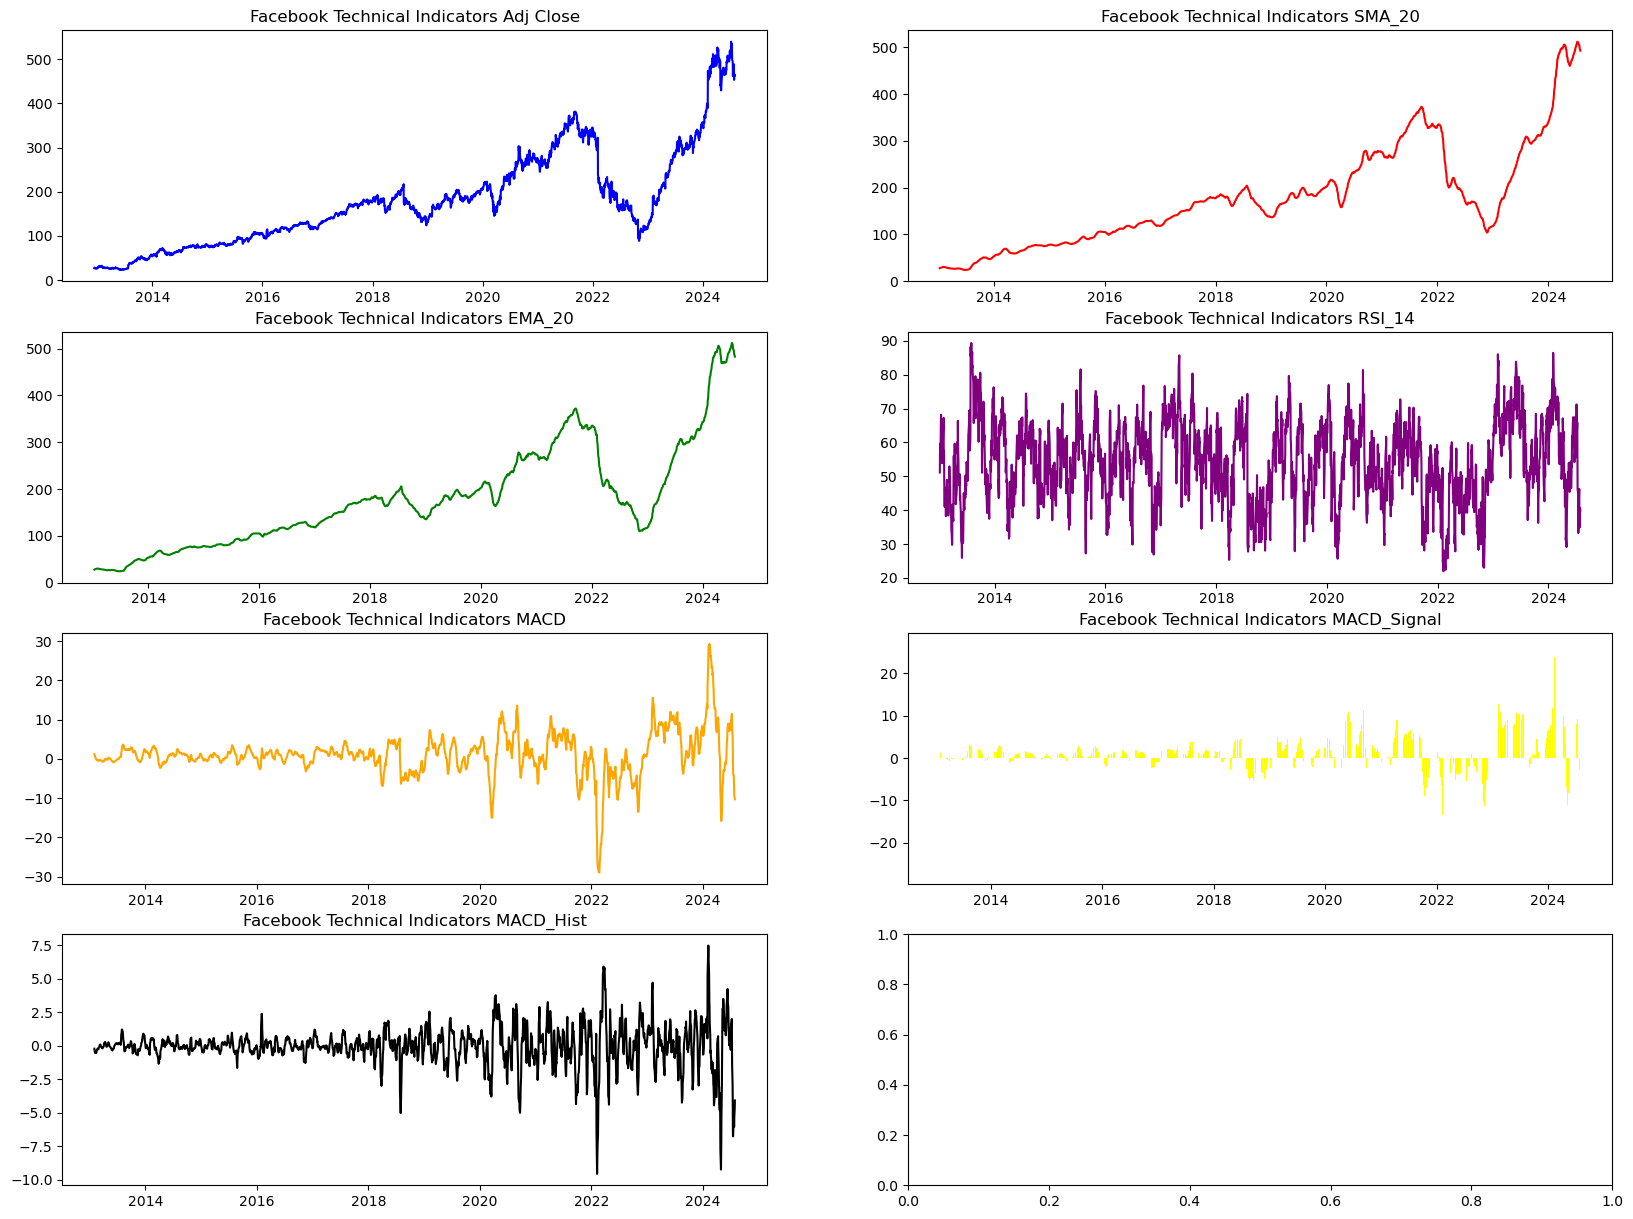

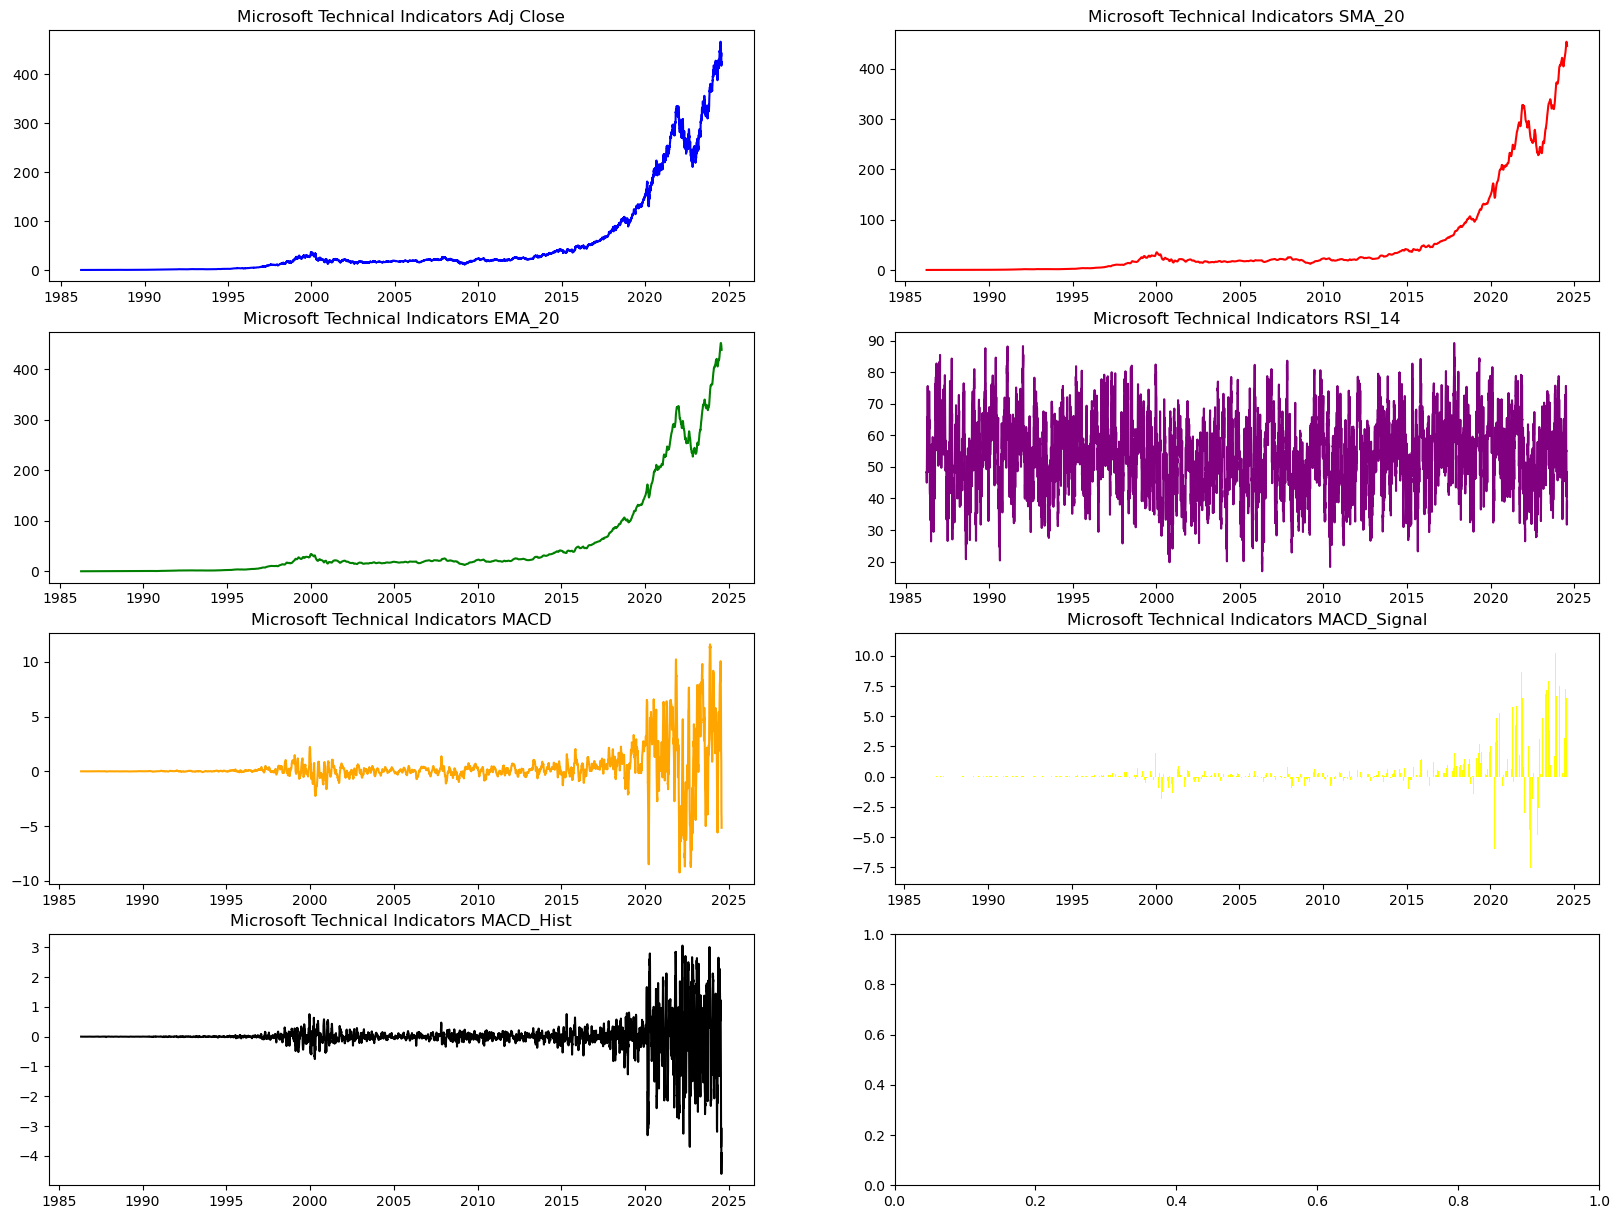

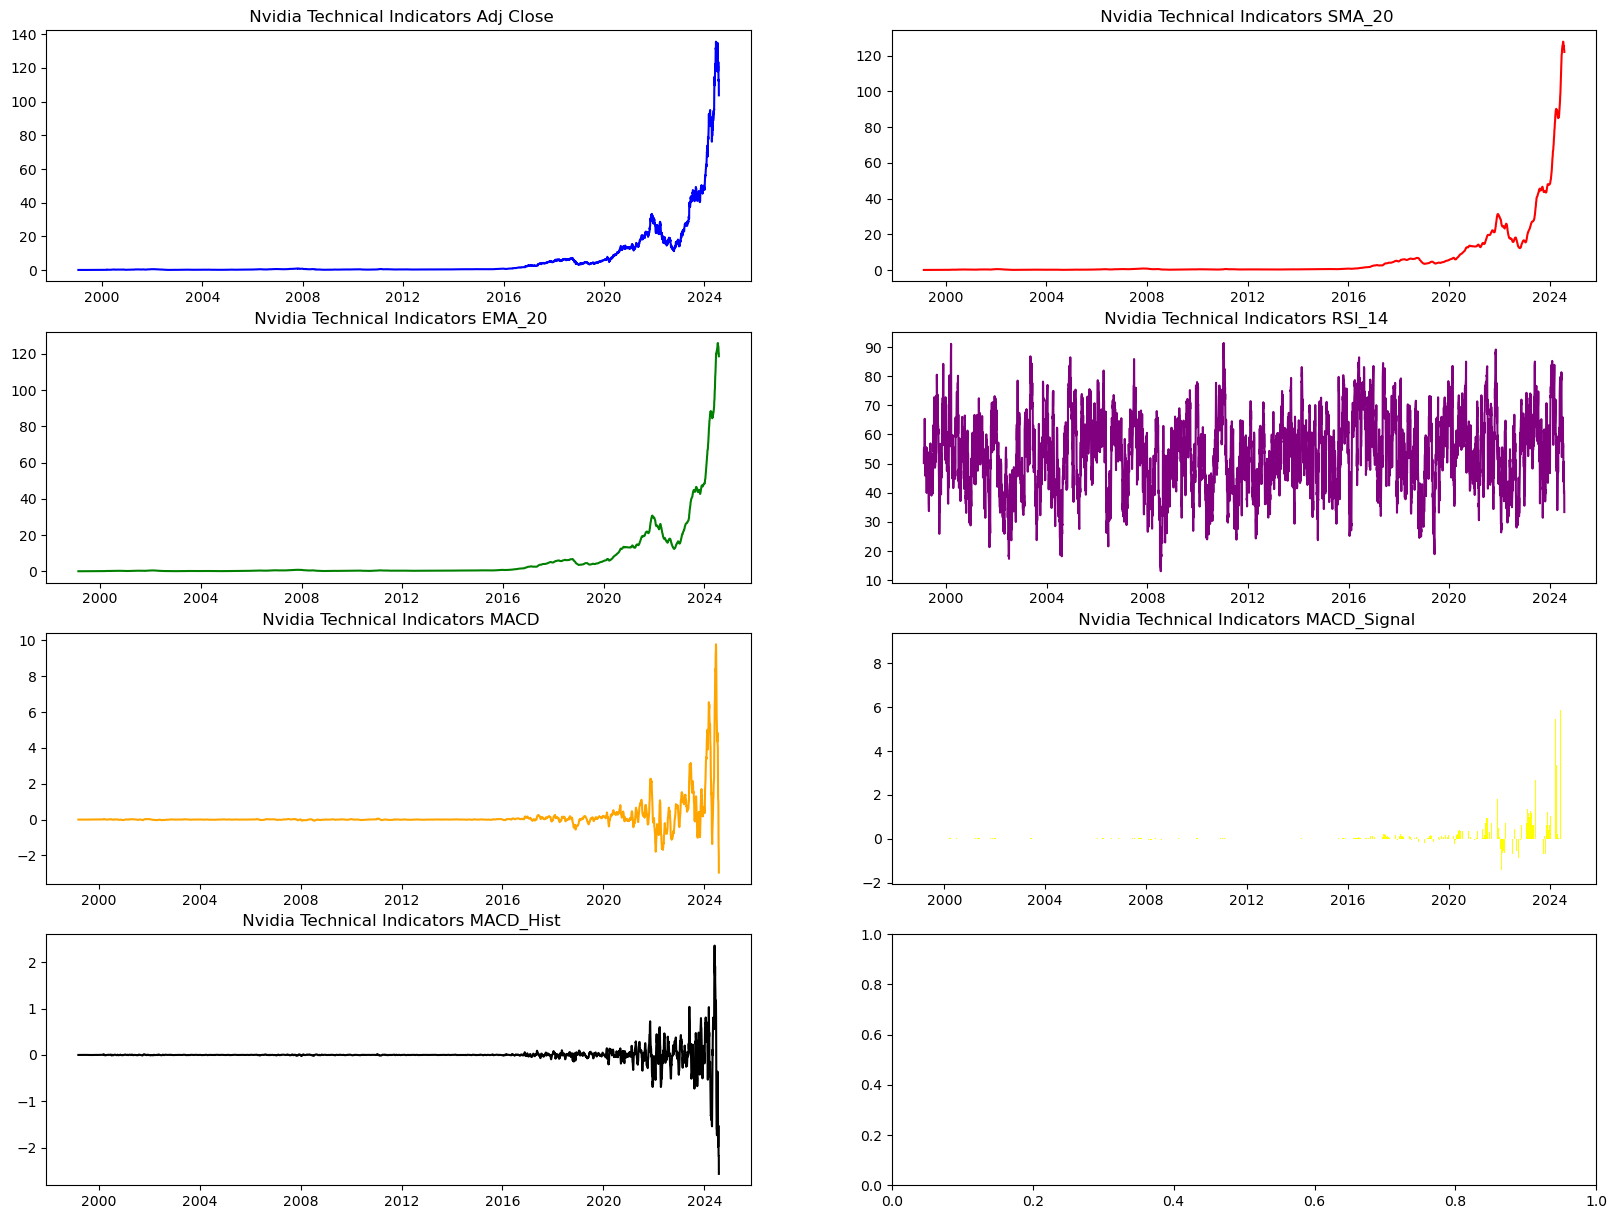

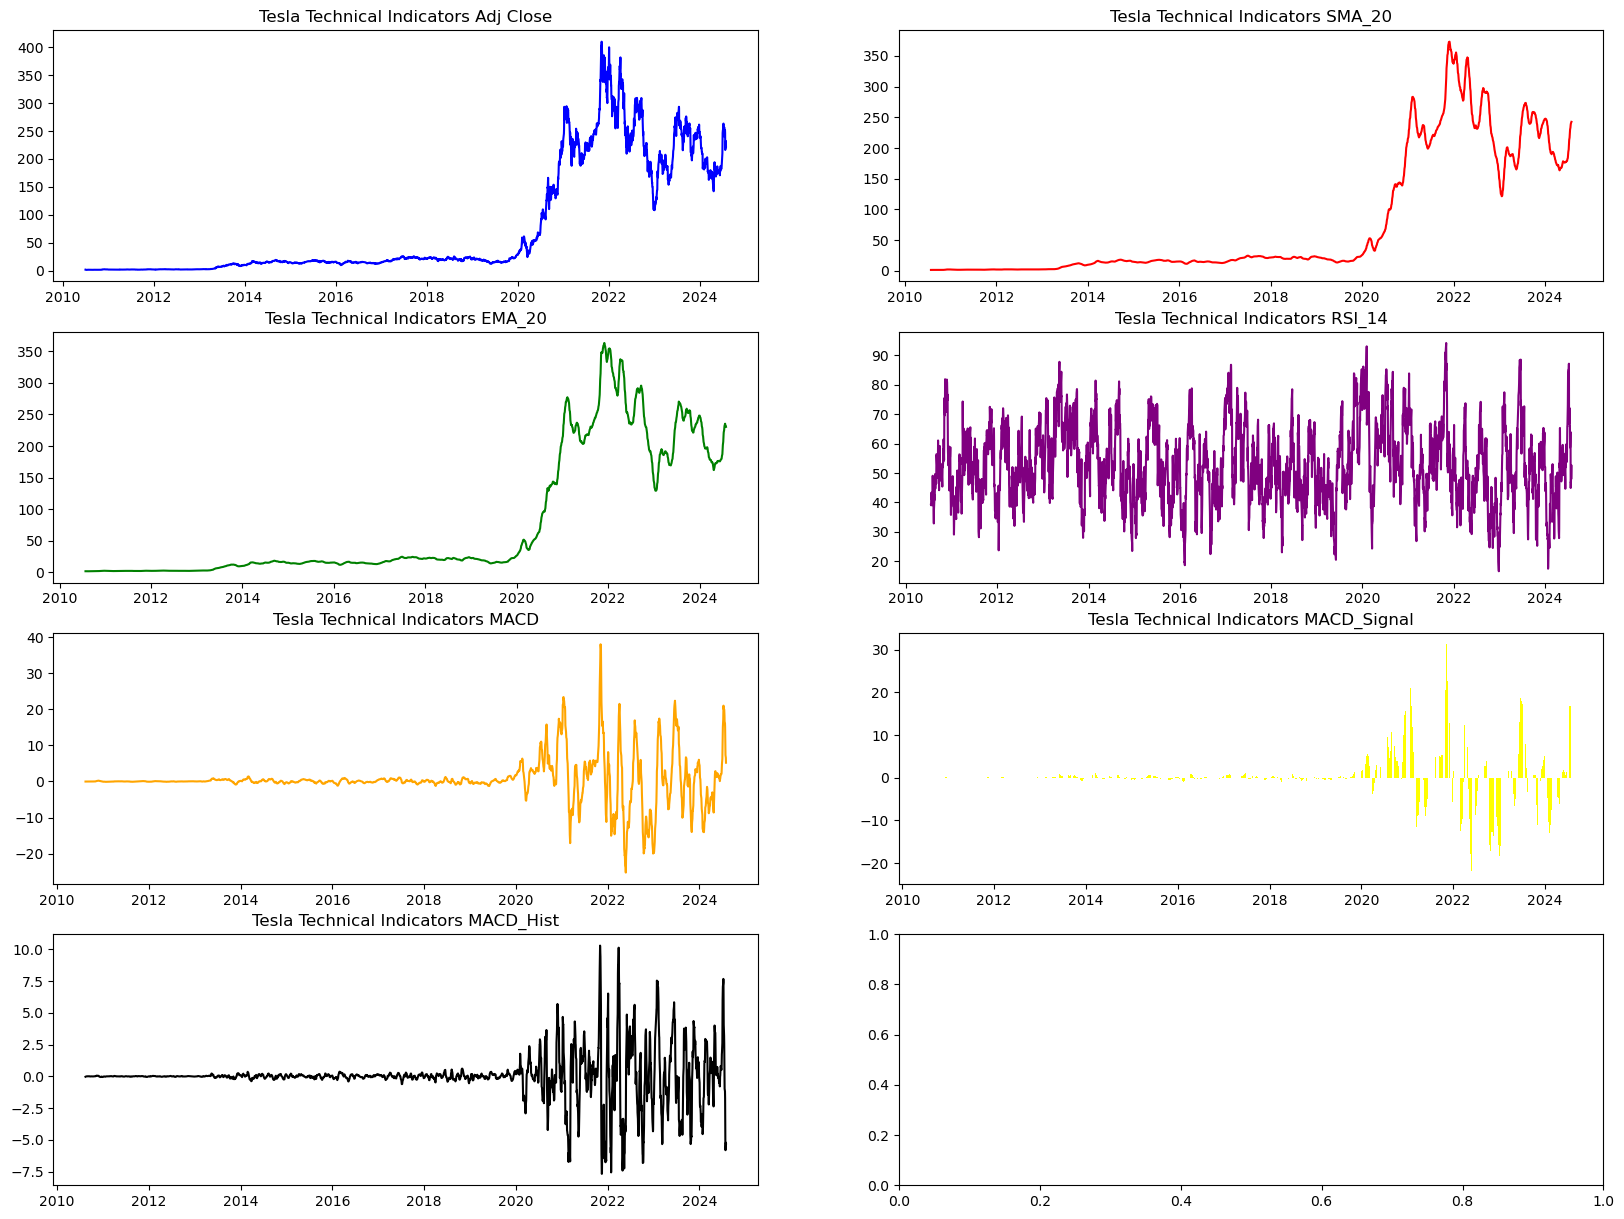

In [12]:
# visualizing all the indicators
company = df_grouped['stock'].unique()
df_date_index = df_grouped.copy()                               # copy therefore to make the date the index
df_date_index['Date'] = pd.to_datetime(df_date_index['Date'])   # making sure Date is in datetime
df_date_index.set_index('Date', inplace=True)                   # making date the index  


ta = ['Adj Close','SMA_20','EMA_20','RSI_14','MACD','MACD_Signal','MACD_Hist']
name = ['Apple', 'Amazon', 'Google', 'Facebook', 'Microsoft', ' Nvidia','Tesla']
color = ['blue','red','green', 'purple', 'orange', 'yellow','black']
for i,com in enumerate(company):
    stock_data = df_grouped[df_grouped['stock'] == com]
    
    X = df_date_index[df_date_index['stock'] == com].index
    
    fig, axs = plt.subplots(4,2, figsize=(20,15))
    axs = axs.flatten()

    for a,t in enumerate(ta):
        if a != 5:
            axs[a].plot(X, stock_data[t], color = color[a])  # line plot
            axs[a].set_title(name[i] + ' Technical Indicators ' + t)
        
        else:
            axs[a].bar(X, stock_data[t], color = color[a])   # Histogram plot for the 'MACD Hist'
            axs[a].set_title(name[i] + ' Technical Indicators ' + t) 
            
#     plt.title(f'{com} Technical Indicators')
    plt.show()

In [11]:
# export to CSV file for task 3
df_grouped.to_csv('stock_price', index = False)